<a href="https://colab.research.google.com/github/SonalDhoke/Data_analysis_and_visualisation/blob/main/DAV_sonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting of google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re

#loading csv
df = pd.read_csv('/content/drive/MyDrive/Colab/Jobs_NYC_Postings.csv')

In [ ]:
df.head() #reading first five records

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,693126,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Admin. Engineer M-II - Deputy Chief of Water &...,ADMINISTRATIVE ENGINEER,Competitive-1,10015,M2,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,12/23/2024,NaN,12/23/2024,10/14/2025
1,711591,DEPT OF ENVIRONMENT PROTECTION,External,1,ACCOUNTABLE MANAGER,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning Public S...",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,04/25/2025,NaN,04/25/2025,10/14/2025
2,723667,DEPT OF ENVIRONMENT PROTECTION,Internal,2,ACCOUNTABLE MANAGER,ADM ENGINEER (NON MGRL),Competitive-1,1001A,00,"Engineering, Architecture, & Planning Public S...",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,08/28/2025,NaN,08/28/2025,10/14/2025
3,690738,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Deputy Section Chief,ADMINISTRATIVE STAFF ANALYST (,Competitive-1,1002A,00,"Finance, Accounting, & Procurement",...,Appointments are subject to OMB approval. For...,Click Apply Now button.,35 hours per week,"96-05 Horace Harding Expressway, 2nd floor Cor...",NaN,New York City residency is generally required ...,11/27/2024,NaN,01/07/2025,10/14/2025
4,748603,DEPARTMENT OF TRANSPORTATION,Internal,1,BOROUGH PLANNER,TRANSPORTATION SPECIALIST,Competitive-1,22316,01,"Engineering, Architecture, & Planning",...,NaN,All resumes to be submitted electronically usi...,Monday-Friday 9AM-5PM,55 Water St Ny Ny,NaN,New York City residency is generally required ...,10/08/2025,21-OCT-2025,10/08/2025,10/14/2025


In [ ]:
df.info() #checking dataframe info - columns and its types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5311 entries, 0 to 5310
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5311 non-null   int64  
 1   Agency                         5311 non-null   object 
 2   Posting Type                   5311 non-null   object 
 3   # Of Positions                 5311 non-null   int64  
 4   Business Title                 5311 non-null   object 
 5   Civil Service Title            5311 non-null   object 
 6   Title Classification           5311 non-null   object 
 7   Title Code No                  5311 non-null   object 
 8   Level                          5311 non-null   object 
 9   Job Category                   5311 non-null   object 
 10  Full-Time/Part-Time indicator  5311 non-null   object 
 11  Career Level                   5311 non-null   object 
 12  Salary Range From              5311 non-null   f

In [ ]:
df.shape #row and column count

(5311, 30)

In [ ]:
df.isnull().sum() #Counting missing values

,0
Job ID,0
Agency,0
Posting Type,0
# Of Positions,0
Business Title,0
Civil Service Title,0
Title Classification,0
Title Code No,0
Level,0
Job Category,0


In [ ]:
df = df.rename(columns={"# Of Positions": "No. Of Positions"})

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Job ID,5311.0,706248.934476,35135.949143,520114.0,698976.0,714342.0,725033.0,750982.0
No. Of Positions,5311.0,2.118433,13.054085,1.0,1.0,1.0,1.0,600.0
Salary Range From,5311.0,68709.953026,30198.896582,0.0,57866.0,66330.0,83743.0,231600.0
Salary Range To,5311.0,93748.728962,47302.704022,17.0,68709.0,90000.0,117605.5,293038.0
Recruitment Contact,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#conversion of date columns
df['Posting Date'] =pd.to_datetime(df['Posting Date'],errors='coerce')
df['Post Until'] =pd.to_datetime(df['Post Until'],errors='coerce')
df['Posting Updated'] =pd.to_datetime(df['Posting Updated'],errors='coerce')
df['Process Date'] =pd.to_datetime(df['Process Date'],errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5311 entries, 0 to 5310
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Job ID                         5311 non-null   int64         
 1   Agency                         5311 non-null   object        
 2   Posting Type                   5311 non-null   object        
 3   No. Of Positions               5311 non-null   int64         
 4   Business Title                 5311 non-null   object        
 5   Civil Service Title            5311 non-null   object        
 6   Title Classification           5311 non-null   object        
 7   Title Code No                  5311 non-null   object        
 8   Level                          5311 non-null   object        
 9   Job Category                   5311 non-null   object        
 10  Full-Time/Part-Time indicator  5311 non-null   object        
 11  Career Level     

/tmp/ipython-input-3109663908.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Post Until'] =pd.to_datetime(df['Post Until'],errors='coerce')


In [ ]:
df.duplicated().sum() #checking for duplicate records
duplicate_row=df[df.duplicated()]
print (duplicate_row)

      Job ID                          Agency Posting Type  No. Of Positions  \
274   628242    DEPARTMENT OF TRANSPORTATION     Internal                 1   
1477  679284    DEPARTMENT OF TRANSPORTATION     Internal                 2   
1501  720487  DEPT OF ENVIRONMENT PROTECTION     Internal                 1   
1775  717170         NYC POLICE PENSION FUND     Internal                 1   
2317  688194    DEPARTMENT OF TRANSPORTATION     Internal                 1   
3002  736302         NYC POLICE PENSION FUND     Internal                 1   
3147  709987  DEPT OF ENVIRONMENT PROTECTION     Internal                 5   
3260  723588        DEPARTMENT OF SANITATION     External                 1   
3585  720486  DEPT OF ENVIRONMENT PROTECTION     Internal                 1   
3735  627043         BRONX DISTRICT ATTORNEY     Internal                20   
4012  747238        DEPARTMENT OF CORRECTION     External                 1   
4180  719655  DEPT OF ENVIRONMENT PROTECTION     Int

In [ ]:
df.drop_duplicates(inplace=True) #removing duplicate records
df.duplicated().sum()

np.int64(0)

In [99]:
df['Posting Year'] = df['Posting Date'].dt.year #extracting month and year
df['Posting Month'] = df['Posting Date'].dt.month_name()


In [ ]:
df['Posting Date'] = pd.to_datetime(df['Posting Date'],errors='coerce') #datetime conversion
df['Post Until'] = pd.to_datetime(df['Post Until'],errors='coerce')
df['Post Duration'] = (df['Post Until'] - df['Posting Date']).dt.days #calculating days difference between posting date and post end date

In [ ]:
#calculating average post duration based on business title and agency
average_post_duration = (df.groupby (['Business Title','Agency']) ['Post Duration']
                         .mean().reset_index().rename(columns={'Post Duration':'Average Post Duration'}))
df = df.merge(average_post_duration,on=['Business Title','Agency'],how='left')


In [ ]:
df.loc[df['Post Until'].isna(),'Post Until'] = df['Posting Date'] + pd.to_timedelta(df['Average Post Duration'],unit='d')


In [ ]:
#default logic - adding 30 days to job post date
df['Post Until'] = df['Post Until'].fillna(df['Posting Date']+pd.Timedelta(days=30))

In [ ]:
df = df.drop (columns=['Post Duration','Average Post Duration','Recruitment Contact'])

In [ ]:
df.isnull().sum() #Counting missing values

,0
Job ID,0
Agency,0
Posting Type,0
No. Of Positions,0
Business Title,0
Civil Service Title,0
Title Classification,0
Title Code No,0
Level,0
Job Category,0


In [ ]:
#Salary range is present but salary frequency given as hourly and daily
#calculating annual average salary based on various parameters.

def annual_avg_salary(row):
  average_salary = (row['Salary Range From'] + row ['Salary Range To'])/2

  if row['Salary Frequency'] == 'Hourly':
    annual_average_salary = average_salary * 2080  #40 hrs * 52 weeks
  elif row['Salary Frequency'] == 'Daily':
    annual_average_salary = average_salary * 260   #365 days in year / weekends = 52 weeks * 2 =104 days / so 365-104 approx 261 days pr year
  else:
    annual_average_salary = average_salary

  if row['Full-Time/Part-Time indicator'] == 'P':
    annual_average_salary = annual_average_salary * 0.5 #part_time salary should be half of full time

  return round(annual_average_salary,2)

df['Annual Average Salary'] = df.apply(annual_avg_salary,axis=1) #row-wise application


In [ ]:
#removing incomplete data in civil service title column
incomplete_civil_service = df['Civil Service Title'].str.count(r'\(')!= df['Civil Service Title'].str.count(r'\)')

In [ ]:
df.loc[incomplete_civil_service,'Civil Service Title']= df.loc[incomplete_civil_service,'Civil Service Title'].str.replace(r'\s*\(.*', '',regex=True).str.strip()


In [ ]:
#checking if we can modify residency requirement based on required/not requied keyword

unique_residancy_req = df[~df['Residency Requirement'].str.contains("required", case=False, na=False)]['Residency Requirement'].unique()
print(unique_residancy_req)


['NYCHA has no residency requirements.'
 'Except as otherwise provided herein, a person serving in a mayoral agency in any of the following civil service or office titles shall be a resident of the City on the date that he or she assumes such title or shall establish city residence within ninety days after such date and shall thereafter maintain city residency for as long as he or she serves in such title: agency heads, including but not limited to Commissioner, Director and Executive Director, First Deputy Commissioner, Executive Deputy Commissioner, Deputy Commissioner, General Counsel, Borough Commissioner, Assistant Deputy Commissioner, Associate Commissioner, Assistant Commissioner, and other senior level staff titles, identified on a list established pursuant to section 2(b) of this Order.'
 'This position is exempt from NYC residency requirements.'
 'There is no residency requirement for this position.'
 'NYCHA has no Residency Requirements.'
 'There is no NYC Residency requirem

In [ ]:
import re
# Patterns for not required
not_required_pattern = r"(no residency requirement|exempt from nyc residency|nycha has no residency|there is no residency requirement)"

# Patterns for required
required_pattern = r"(must be a new york city resident|shall be a resident of the city|establish city residence|residency required|you must be a resident of the city)"

def extract_residency_status(text):
    if pd.isna(text):
        return "Unknown"

    text_lower = str(text).lower()

    if re.search(not_required_pattern, text_lower):
        return "Not Required"

    elif re.search(required_pattern, text_lower):
        return "Required"

    elif "required" in text_lower:
        return "Required"

    elif "not required" in text_lower:
        return "Not Required"

    return "Unknown"


In [ ]:
df['Residency Requirement'] = df['Residency Requirement'].apply(extract_residency_status)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Job ID                         5293 non-null   int64         
 1   Agency                         5293 non-null   object        
 2   Posting Type                   5293 non-null   object        
 3   No. Of Positions               5293 non-null   int64         
 4   Business Title                 5293 non-null   object        
 5   Civil Service Title            5293 non-null   object        
 6   Title Classification           5293 non-null   object        
 7   Title Code No                  5293 non-null   object        
 8   Level                          5293 non-null   object        
 9   Job Category                   5293 non-null   object        
 10  Full-Time/Part-Time indicator  5293 non-null   object        
 11  Career Level     

In [ ]:
df['Residency Requirement'].value_counts()

,count
Residency Requirement,
Required,5133
Not Required,150
Unknown,10


In [ ]:
df.isna().sum()

,0
Job ID,0
Agency,0
Posting Type,0
No. Of Positions,0
Business Title,0
Civil Service Title,0
Title Classification,0
Title Code No,0
Level,0
Job Category,0


In [ ]:
#removing text columns
df = df.drop (columns=['Minimum Qual Requirements','Preferred Skills','Additional Information','To Apply','Work Location 1','Hours/Shift'])

In [ ]:
df.to_csv("Cleaned_Jobs_NYC_Postings_13nov.csv",index='False')

In [ ]:
df.isna().sum()

,0
Job ID,0
Agency,0
Posting Type,0
No. Of Positions,0
Business Title,0
Civil Service Title,0
Title Classification,0
Title Code No,0
Level,0
Job Category,0


In [ ]:
#single variable

df['Agency'].value_counts().head(10) #top 10 agencies in NYC

,count
Agency,
DEPT OF HEALTH/MENTAL HYGIENE,1013
DEPT OF ENVIRONMENT PROTECTION,991
DEPT OF DESIGN & CONSTRUCTION,636
DEPARTMENT OF TRANSPORTATION,462
HRA/DEPT OF SOCIAL SERVICES,364
BRONX DISTRICT ATTORNEY,240
HOUSING PRESERVATION & DVLPMNT,156
NYC HOUSING AUTHORITY,132
DEPARTMENT OF CORRECTION,112


In [ ]:
df['Job Category'].value_counts().head(10) #top 10 job categories

,count
Job Category,
"Engineering, Architecture, & Planning",892
Health,515
"Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement",439
Legal Affairs,358
"Finance, Accounting, & Procurement",292
"Policy, Research & Analysis",273
Administration & Human Resources,267
"Technology, Data & Innovation",247
Constituent Services & Community Programs,232


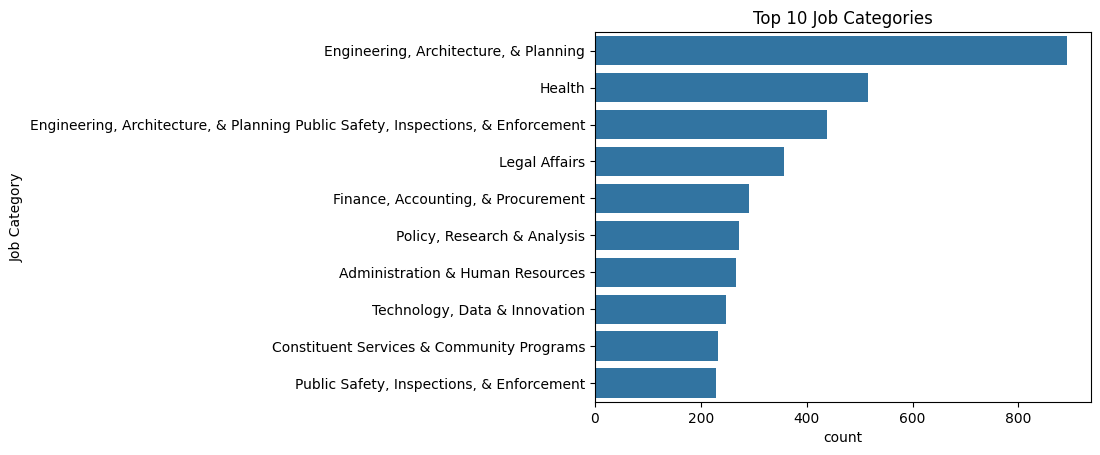

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='Job Category',data=df,order=df['Job Category'].value_counts().head(10).index)
plt.title('Top 10 Job Categories')
plt.show()

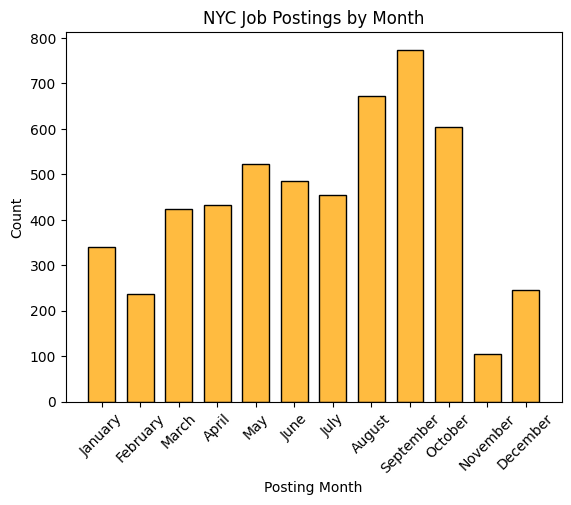

In [ ]:
Months_Seq=['January','February','March','April','May','June','July','August','September','October','November','December']
df['Posting Month'] = pd.Categorical(df['Posting Month'],categories=Months_Seq,ordered=True)
sns.histplot(df['Posting Month'],color = 'orange' , edgecolor= 'black', shrink=0.7,bins=40)
plt.title('NYC Job Postings by Month')
plt.xticks(rotation=45)
plt.show()



In [ ]:
df['Work Location'].value_counts().head(10) #top 10 work locations

,count
Work Location,
30-30 Thomson Ave L I City Qns,620
42-09 28th Street,445
96-05 Horace Harding Expway,431
55 Water St Ny Ny,364
59-17 Junction Blvd Corona Ny,262
198 E161St Street Bronx N.Y.,186
4 World Trade Center,170
NYC - All Boroughs,158
"100 Church St., N.Y.",143


In [ ]:
import plotly.express as px

fig = px.violin(
    df,
    x='Full-Time/Part-Time indicator',
    y='Annual Average Salary',
    color='Full-Time/Part-Time indicator',
    box=True,               # show inner box (quartiles)
    points='all',           # show all data points
)

fig.update_layout(
    title='Salary Distribution by Employment Type',
    xaxis_title='Employment Type',
    yaxis_title='Annual Average Salary'
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.colors as pc


# Group by Title Classification and calculate average salary
avg_salary_by_class = df.groupby('Title Classification')['Annual Average Salary'].mean().reset_index()
avg_salary_by_class = avg_salary_by_class.sort_values('Annual Average Salary')

# Create a pastel color palette
pastel_colors = pc.qualitative.Pastel
# Repeat the palette if there are more categories than colors
colors = [pastel_colors[i % len(pastel_colors)] for i in range(len(avg_salary_by_class))]

# Create figure
fig = go.Figure()

# Add stems (lines from zero to each marker) with pastel colors
for i, row in avg_salary_by_class.iterrows():
    fig.add_shape(
        type="line",
        x0=row['Title Classification'],
        y0=0,
        x1=row['Title Classification'],
        y1=row['Annual Average Salary'],
        line=dict(color=colors[i], width=3)
    )

# Add lollipop heads (markers) with the same pastel color as the stem
fig.add_trace(go.Scatter(
    x=avg_salary_by_class['Title Classification'],
    y=avg_salary_by_class['Annual Average Salary'],
    mode='markers',
    marker=dict(
        size=12,
        color=colors,          # pastel colors matching stems
        line=dict(width=1, color='DarkSlateGrey')
    ),
    hovertemplate='<b>%{x}</b><br>Average Salary: $%{y:,.0f}<extra></extra>'
))

# Customize layout
fig.update_layout(
    title='Average Annual Salary by Title Classification in NYC',
    xaxis_title='Title Classification',
    yaxis_title='Average Annual Salary',
    xaxis_tickangle=-90,
    template='plotly_white',
    plot_bgcolor='#f9f9f9',
    paper_bgcolor='#dfefff',
    xaxis=dict(showgrid=True, gridcolor='#e0e0e0', zerolinecolor='#999999'),
    yaxis=dict(showgrid=True, gridcolor='#e0e0e0', zerolinecolor='#999999'),
    height=600
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# -----------------------------
# Load dataset
# -----------------------------
# Assuming df is already loaded with columns: 'Posting Year', 'Career Level', 'No. Of Positions'

years = sorted(df["Posting Year"].dropna().unique())
TOP_N_MAX = 20  # maximum number of top categories
default_top_n = 10
selected_year = years[0]
colors = ["#FF6B6B", "#4ECDC4", "#556270", "#C7F464", "#C44D58"]

# -----------------------------
# Helper function: group top N + other
# -----------------------------
def get_grouped_data(year, top_n):
    filtered = df[df["Posting Year"] == year]
    grouped = filtered.groupby("Career Level")["No. Of Positions"].sum().reset_index()
    grouped = grouped.sort_values("No. Of Positions", ascending=False)
    if len(grouped) > top_n:
        top = grouped.head(top_n)
        others = pd.DataFrame({
            "Career Level": ["Other"],
            "No. Of Positions": [grouped["No. Of Positions"][top_n:].sum()]
        })
        grouped = pd.concat([top, others], ignore_index=True)
    return grouped

# -----------------------------
# Initial figure
# -----------------------------
grouped = get_grouped_data(selected_year, default_top_n)

fig = go.Figure(go.Pie(
    labels=grouped["Career Level"],
    values=grouped["No. Of Positions"],
    marker=dict(colors=colors),
    hole=0.35
))

# -----------------------------
# Dropdown for year
# -----------------------------
year_buttons = []
for year in years:
    grouped_year = get_grouped_data(year, default_top_n)
    year_buttons.append(dict(
        label=str(year),
        method="update",
        args=[{"labels": [grouped_year["Career Level"]],
               "values": [grouped_year["No. Of Positions"]]},
              {"title": f"Career Level Distribution in {year}"}]
    ))

# -----------------------------
# Slider for Top N
# -----------------------------


# -----------------------------
# Layout with fixed controls above header
# -----------------------------
fig.update_layout(
    title=f"Career Level Distribution in {selected_year}",
    margin=dict(t=200),  # more top margin to accommodate controls
    # Dropdown: fixed above chart
    updatemenus=[dict(
        buttons=year_buttons,
        direction="down",
        showactive=True,
        x=0.1,#1.3,
        y=1.25,  # slightly above title
        xanchor="right",
        yanchor="bottom",
        pad={"r": 10, "t": 10},
        bgcolor="#f0f0f0",
        bordercolor="#cccccc",
        font=dict(size=12),
        active=0
    )],

)

# Annotation text for dropdown
fig.add_annotation(
    dict(
        x=0,#0.5,
        y=1.27,  # above dropdown
        xref='paper',
        yref='paper',
        xanchor="right",
        yanchor="bottom",
        text="Select Year:",
        showarrow=False,
        font=dict(size=13)
    )
)

fig.show()





In [ ]:

# Sum positions by agency and posting type
stack_data = df.groupby(
    ['Agency', 'Posting Type']
)['No. Of Positions'].sum().reset_index()


In [ ]:

fig = px.bar(
    stack_data,
    y='Agency',                # horizontal bars
    x='No. Of Positions',
    color='Posting Type',       # internal vs external
    text='No. Of Positions',    # show numbers on bars
    title='Number of Positions by Agency and Posting Type',
    orientation='h',           # horizontal
    hover_data={'No. Of Positions': True, 'Posting Type': True, 'Agency': True},
    barmode='stack'
)

# Sort agencies by total positions for better readability
total_positions = stack_data.groupby('Agency')['No. Of Positions'].sum().sort_values(ascending=True)
fig.update_yaxes(categoryorder='array', categoryarray=total_positions.index)

# Improve layout for readability
fig.update_layout(
    xaxis_title='Number of Positions',
    yaxis_title='Agency',
    legend_title='Posting Type',
    height=800                # adjust height for many agencies
)

fig.show()


In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd

# Ensure Residency Required is categorical with all categories

df['Residency Requirement'] = pd.Categorical(
df['Residency Requirement'],
categories=['Required', 'Not Required', 'Unknown']
)

# Aggregate data for bubble chart

bubble_data = df.groupby(
['Career Level', 'Posting Type', 'Residency Requirement']
)['No. Of Positions'].sum().reset_index()

# Apply square root scaling for bubble size

bubble_data['size_scaled'] = np.sqrt(bubble_data['No. Of Positions'])

# Create Bubble Chart with explicit color mapping

fig_bubble = px.scatter(
bubble_data,
x='Career Level',
y='Posting Type',
size='size_scaled',
color='Residency Requirement',
color_discrete_map={
'Required': 'crimson',
'Not Required': 'royalblue',
'Unknown': 'orange'
},
title='Interactive Bubble Chart: Job Level vs Posting Type vs Residency Requirement',
hover_name='Career Level',
hover_data={
'No. Of Positions': True,
'Residency Requirement': True,
'Posting Type': True
},
size_max=100
)

# Update layout for readability

fig_bubble.update_layout(
xaxis_title='Career Level',
yaxis_title='Posting Type',
legend_title='Residency Requirement'
)

fig_bubble.show()


/tmp/ipython-input-1103691944.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:

# Count number of postings per day
daily_counts = df.groupby('Posting Date').size().reset_index(name='Num_Postings')

fig = px.density_heatmap(
    daily_counts,
    x=daily_counts['Posting Date'].dt.month,  # Month on x-axis
    y=daily_counts['Posting Date'].dt.year,   # Year on y-axis
    z='Num_Postings',
    histfunc='sum',
    labels={'x':'Month', 'y':'Year', 'z':'Number of Postings'},
    color_continuous_scale='Viridis'
)

fig.update_layout(
    title='Calendar Heatmap of Job Postings',
    xaxis=dict(tickmode='array', tickvals=list(range(1,13)), ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']),
)
fig.show()

In [ ]:

# Count postings per day
daily_counts = df.groupby('Posting Date').size().reset_index(name='Num_Postings')

# Extract year, week, and weekday
daily_counts['Year'] = daily_counts['Posting Date'].dt.year
daily_counts['Week'] = daily_counts['Posting Date'].dt.isocalendar().week
daily_counts['Weekday'] = daily_counts['Posting Date'].dt.weekday  # Monday=0


In [84]:
import plotly.express as px

fig = px.scatter(
    daily_counts,
    x='Week',
    y='Weekday',
    size='Num_Postings',            # Size of dot = number of postings
    color='Num_Postings',           # Color intensity
    hover_data=['Posting Date', 'Num_Postings'],
    facet_col='Year',               # Separate heatmaps for each year
    color_continuous_scale='Viridis'
)

# Flip y-axis to have Monday at the top
fig.update_yaxes(autorange='reversed', tickvals=[0,1,2,3,4,5,6], ticktext=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

fig.update_layout(
    title='Daily Calendar Heatmap of Job Postings',
    xaxis_title='Week of Year',
    yaxis_title='Day of Week',
    showlegend=False
)

fig.show()


In [86]:

# Count postings per month per employment type
monthly_counts = df.groupby(['Posting Month', 'Full-Time/Part-Time indicator']).size().reset_index(name='Num_Postings')

# Optional: order months correctly
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_counts['Posting Month'] = pd.Categorical(monthly_counts['Posting Month'], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values('Posting Month')


/tmp/ipython-input-3610491251.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [88]:
import plotly.express as px

fig = px.bar(
    monthly_counts,
    x='Posting Month',
    y='Num_Postings',
    color='Full-Time/Part-Time indicator',
    barmode='group',    # or 'overlay' for density effect
    hover_data=['Num_Postings'],
    title='Monthly Posting Count by Employment Type'
)

fig.update_layout(
    xaxis_title='Posting Month',
    yaxis_title='Number of Postings'
)

fig.show()


In [102]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', 'No. Of Positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Career Level', 'Salary Range From',
       'Salary Range To', 'Salary Frequency', 'Work Location',
       'Division/Work Unit', 'Job Description', 'Residency Requirement',
       'Posting Date', 'Post Until', 'Posting Updated', 'Process Date',
       'Posting Year', 'Posting Month', 'Annual Average Salary', 'Borough',
       'DayOfYear'],
      dtype='object')

In [108]:
import pandas as pd
import plotly.express as px

# Ensure datetime
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df['Posting Year'] = df['Posting Date'].dt.year
df['Posting Month'] = df['Posting Date'].dt.month  # Or use dt.strftime('%b')

# Aggregate counts by Month, Employment Type, Year
monthly_counts = df.groupby(
    ['Posting Month', 'Full-Time/Part-Time indicator', 'Posting Year']
).size().reset_index(name='Num_Postings')

# Plot grouped + stacked bar
fig = px.bar(
    monthly_counts,
    x='Posting Month',
    y='Num_Postings',
    color='Posting Year',                          # Stack by year
    barmode='stack',                               # Stack vertically
    facet_col='Full-Time/Part-Time indicator',    # Two side-by-side bars per month
    hover_data=['Num_Postings'],
    title='Monthly Job Postings by Employment Type and Year'
)

fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(1,13)),
               ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']),
    yaxis_title='Number of Postings'
)

fig.show()


In [91]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

df['DayOfYear'] = df['Posting Date'].dt.dayofyear

# Separate by employment type
groups = df.groupby('Full-Time/Part-Time indicator')


In [92]:
kde_data = {}

for name, group in groups:
    if len(group) > 1:  # Only compute KDE if enough points
        kde = gaussian_kde(group['DayOfYear'])
        x = np.linspace(1, 366, 366)
        y = kde(x)
        kde_data[name] = (x, y)
    else:
        print(f"Not enough data for {name}, skipping KDE.")


In [93]:
for name in kde_data:
    x_dates = pd.to_datetime(kde_data[name][0], format='%j', errors='coerce').month
    kde_data[name] = (x_dates, kde_data[name][1])


In [94]:
import plotly.graph_objects as go

fig = go.Figure()

colors = {'Full-Time':'royalblue', 'Part-Time':'orange'}

for name, (x, y) in kde_data.items():
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='lines',
        name=name,
        line=dict(color=colors.get(name, 'gray'))
    ))

fig.update_layout(
    title='Density of Job Postings by Month',
    xaxis_title='Month',
    yaxis_title='Density',
    xaxis=dict(
        tickmode='array',
        tickvals=np.arange(1,13),
        ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    )
)

fig.show()
